<div class="usecase-title">UC00187: Analysing Business Vulnerability to Foot Traffic Decline During Extreme Weather</div>
<div class="usecase-authors"><b>Authored by:</b> Vyshnavi Dinesh</div>
<div class="usecase-duration"><b>Duration:</b> 90 mins</div>
<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level:</b> Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills:</b> Python, pandas, matplotlib, seaborn</div>
</div>


<div class="usecase-section-header">Scenario</div>
<p class="usecase-subsection-blurb">
As a data analyst working with Melbourne Open Data, I want to analyse how extreme weather affects foot traffic at business-critical locations, so that business owners and city planners can prepare for and mitigate economic impacts.
</p>


<div class="usecase-section-header">What this use case will teach you</div>

- How to load and clean public urban datasets
- How to align and merge timestamped datasets
- How to explore foot traffic trends against temperature
- How to visualise, interpret, and communicate business insights


<div class="usecase-section-header">Background</div>

Foot traffic plays a critical role in Melbourne's economic activity, especially for retail, food, and entertainment businesses. During extreme weather events—particularly heatwaves—people are less likely to walk outdoors, affecting businesses dependent on footfall. Using pedestrian sensor and microclimate sensor data from the City of Melbourne, this analysis helps quantify and visualise the extent of foot traffic vulnerability during such conditions.


**Load & Inspect**

We begin by collecting the datasets from the City of Melbourne Open Data API.
Microclimate data provides hourly weather readings (temperature, humidity).
Pedestrian counting data provides hourly foot traffic by sensor location.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pandas as pd
from io import StringIO


The `collect_dataset_from_com` function is designed to fetch datasets from the City of Melbourne Open Data API using the export endpoint. It takes three parameters: `dataset_id` (the unique ID of the dataset), `format` (the file format to export, which defaults to CSV), and `delimiter` (the delimiter used in the CSV file, which defaults to `;`). The function constructs the API URL, sends a request with parameters like language and timezone, and retrieves the data. If the request is successful (status code 200), the dataset is returned as a **Pandas DataFrame**. If the request fails, an exception is raised with the status code. This function simplifies the process of fetching and loading public datasets into a format suitable for analysis.


In [ ]:
def collect_dataset_from_com(dataset_id, format='csv', delimiter=';'):
    """
    Fetches a dataset from the City of Melbourne Open Data API using the export endpoint.

    Args:
        dataset_id (str): Dataset ID from the data portal URL
        format (str): File format to export (default: 'csv')
        delimiter (str): CSV delimiter (default: ';')

    Returns:
        pd.DataFrame: Cleaned dataset
    """
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    url = f'{base_url}{dataset_id}/exports/{format}'

    params = {
        'select': '*',
        'limit': -1,
        'lang': 'en',
        'timezone': 'UTC'
    }

    response = requests.get(url, params=params)
    if response.status_code == 200:
        content = response.content.decode('utf-8')
        return pd.read_csv(StringIO(content), delimiter=delimiter)
    else:
        raise Exception(f"Failed to retrieve dataset '{dataset_id}'. Status code: {response.status_code}")

In [ ]:
microclimate_dataset_id = 'microclimate-sensors-data'
microclimate_data = collect_dataset_from_com(microclimate_dataset_id)
print(f"Retrieved {len(microclimate_data)} records from '{microclimate_dataset_id}'")
microclimate_data.head()


Retrieved 446375 records from 'microclimate-sensors-data'


,device_id,received_at,sensorlocation,latlong,minimumwinddirection,averagewinddirection,maximumwinddirection,minimumwindspeed,averagewindspeed,gustwindspeed,airtemperature,relativehumidity,atmosphericpressure,pm25,pm10,noise
0,ICTMicroclimate-03,2025-08-17T15:10:39+00:00,CH1 rooftop,"-37.8140348, 144.96728",169.0,183.0,193.0,1.5,1.7,2.2,9.1,71.8,1018.9,1.0,3.0,74.7
1,ICTMicroclimate-08,2025-08-17T14:31:30+00:00,Swanston St - Tram Stop 13 adjacent Federation...,"-37.8184515, 144.9678474",0.0,0.0,347.0,0.0,0.0,1.2,8.8,68.8,1024.7,2.0,2.0,60.1
2,ICTMicroclimate-07,2025-08-17T14:25:48+00:00,Tram Stop 7C - Melbourne Tennis Centre Precinc...,"-37.8222341, 144.9829409",0.0,0.0,351.0,0.0,0.0,0.7,8.0,72.2,1026.9,1.0,1.0,57.0
3,ICTMicroclimate-02,2025-08-17T14:32:01+00:00,101 Collins St L11 Rooftop,"-37.814604, 144.9702991",0.0,56.0,150.0,0.0,0.3,0.7,9.9,69.5,1019.3,1.0,3.0,68.6
4,ICTMicroclimate-08,2025-08-17T14:46:32+00:00,Swanston St - Tram Stop 13 adjacent Federation...,"-37.8184515, 144.9678474",0.0,144.0,179.0,0.0,0.5,1.0,8.7,68.8,1024.9,2.0,2.0,59.8


<div class="usecase-section-header">Visualisations</div>


In [ ]:
pedestrian_dataset_id = 'pedestrian-counting-system-monthly-counts-per-hour'
pedestrian_data = collect_dataset_from_com(pedestrian_dataset_id)
print(f"Retrieved {len(pedestrian_data)} records from '{pedestrian_dataset_id}'")
pedestrian_data.head()


Retrieved 1404736 records from 'pedestrian-counting-system-monthly-counts-per-hour'


,id,location_id,sensing_date,hourday,direction_1,direction_2,pedestriancount,sensor_name,location
0,78520240223,78,2024-02-23,5,0,2,2,HarEsB_T,"-37.81471642, 144.9446508"
1,291520241025,29,2024-10-25,15,295,474,769,AG_T,"-37.8199817, 144.96872865"
2,71020241219,71,2024-12-19,0,7,4,11,WestWP_T,"-37.81235775, 144.97136962"
3,31520231202,31,2023-12-02,5,6,5,11,Lyg161_T,"-37.80169681, 144.96658911"
4,311520240212,31,2024-02-12,15,124,122,246,Lyg161_T,"-37.80169681, 144.96658911"


**Step 2: Data Cleaning & Merge**

Since sensor names do not match across datasets, we merge only on timestamp.
This still allows us to analyse how extreme weather influences overall foot traffic.

In [ ]:
# Aggregate microclimate readings to 1 row per timestamp
microclimate_agg = microclimate_data.groupby('timestamp').agg({
    'temp_C': 'mean',
    'humidity_pct': 'mean'
}).reset_index()

print("Microclimate aggregated shape:", microclimate_agg.shape)

# Merge again (now smaller!)
merged = pd.merge(
    pedestrian_data[['timestamp','hourly_counts']],
    microclimate_agg,
    on='timestamp',
    how='inner'
)

print("\n--- Merged Dataset (time only, aggregated) ---")
print(merged.shape)
print(merged.head())


Microclimate aggregated shape: (11214, 3)

--- Merged Dataset (time only, aggregated) ---
(927861, 4)
                  timestamp  hourly_counts     temp_C  humidity_pct
0 2024-10-25 15:00:00+00:00            769   9.768293     67.826829
1 2024-12-19 00:00:00+00:00             11  25.331915     37.100000
2 2025-08-25 16:00:00+00:00            475  16.636842     42.363158
3 2024-11-12 07:00:00+00:00            226  18.961364     77.875000
4 2024-07-13 08:00:00+00:00             97  10.814286     86.446429


 **Exploratory Data Analysis (EDA)**

We begin exploring the merged dataset to identify overall patterns:

The total trend of foot traffic over time.

The relationship between temperature and pedestrian counts.

The relationship between humidity and pedestrian counts.

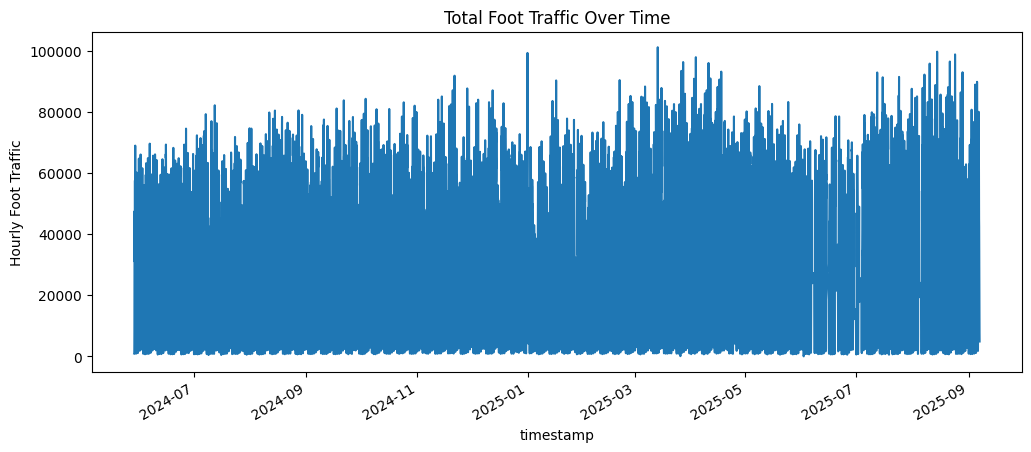

In [ ]:
# Foot traffic trend over time
plt.figure(figsize=(12,5))
merged.groupby("timestamp")['hourly_counts'].sum().plot()
plt.title("Total Foot Traffic Over Time")
plt.ylabel("Hourly Foot Traffic")
plt.show()




Foot traffic is generally stable and consistently high, showing strong daily and weekly cycles. However, there are noticeable sharp dips, suggesting that extreme weather or other disruptions (e.g., holidays, unusual events) can significantly reduce pedestrian numbers. Occasional spikes indicate large-scale public events driving short-term surges in activity.

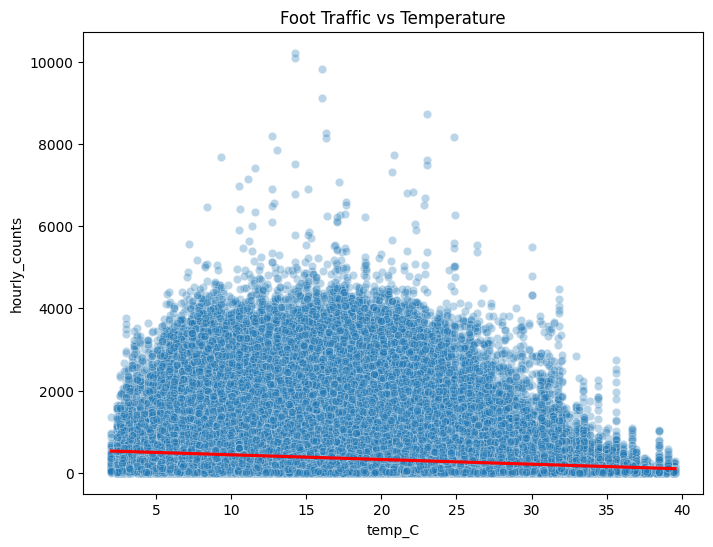

In [ ]:
# Foot traffic vs temperature
plt.figure(figsize=(8,6))
sns.scatterplot(x="temp_C", y="hourly_counts", data=merged, alpha=0.3)
sns.regplot(x="temp_C", y="hourly_counts", data=merged, scatter=False, color="red")
plt.title("Foot Traffic vs Temperature")
plt.show()



The plot shows that foot traffic is highest at moderate temperatures (around 10–20 °C) and steadily declines at the extremes. Very hot (>30 °C) or cold (<5 °C) conditions are associated with noticeably fewer pedestrians. The red regression line also shows a slight downward trend overall, confirming that as temperatures move away from the comfort range, pedestrian activity — and therefore business opportunities — decrease.

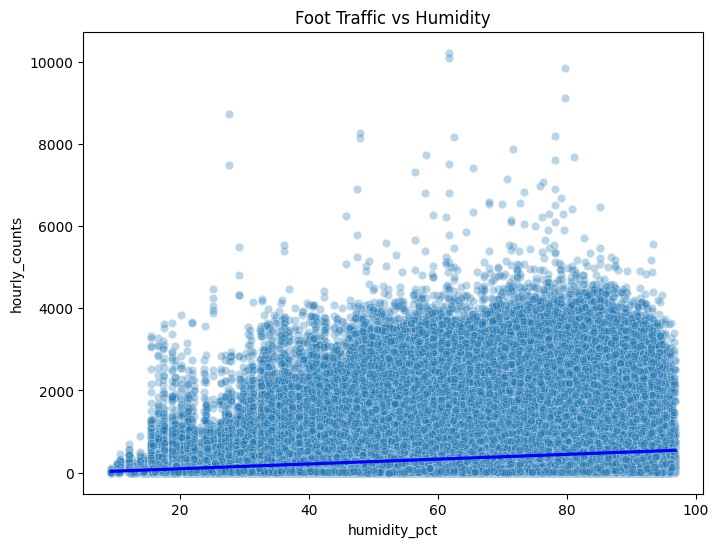

In [ ]:
# Foot traffic vs humidity
plt.figure(figsize=(8,6))
sns.scatterplot(x="humidity_pct", y="hourly_counts", data=merged, alpha=0.3)
sns.regplot(x="humidity_pct", y="hourly_counts", data=merged, scatter=False, color="blue")
plt.title("Foot Traffic vs Humidity")
plt.show()

Insight: Foot Traffic vs Humidity

The plot shows that pedestrian activity remains relatively consistent across most humidity levels, with only a slight upward trend as humidity increases. This suggests that humidity has a weaker impact on foot traffic compared to temperature. However, extreme humidity levels (very high >80% or very low <20%) show more variability, which may reflect discomfort or weather events (e.g., heavy rain), influencing pedestrian movement.

**Outlier & Event Detection**

In this step, we detect extreme weather conditions and identify vulnerability events where pedestrian activity is significantly reduced.
Extreme weather is defined as days with an average temperature above 35 °C or below 10 °C.
Vulnerability events are defined as the lowest 5% of pedestrian activity days.

In [ ]:
# Daily aggregation
daily = merged.groupby(merged['timestamp'].dt.date).agg({
    'hourly_counts': 'sum',
    'temp_C': 'mean',
    'humidity_pct': 'mean'
}).reset_index()

# Extreme weather days
extreme_weather = daily[(daily['temp_C'] > 35) | (daily['temp_C'] < 10)]
print("\nExtreme Weather Days:\n", extreme_weather.head())

# Vulnerability events (lowest 5%)
threshold = np.percentile(daily['hourly_counts'], 5)
vulnerability_events = daily[daily['hourly_counts'] < threshold]
print("\nVulnerability Events:\n", vulnerability_events.head())



Extreme Weather Days:
      timestamp  hourly_counts    temp_C  humidity_pct
15  2024-06-13         640194  9.533192     92.277700
16  2024-06-14         722350  9.161130     87.180459
19  2024-06-17         608655  9.441218     77.234636
20  2024-06-18         636051  7.514678     75.231353
21  2024-06-19         659173  8.125588     72.228928

Vulnerability Events:
      timestamp  hourly_counts     temp_C  humidity_pct
41  2024-07-09         469748  11.348560     91.221675
47  2024-07-15         486046  10.601149     88.416503
60  2024-07-28         537037   8.699310     82.098068
61  2024-07-29         536588   9.732091     93.003117
96  2024-09-02         513261   9.543081     63.104638


Visualising Vulnerability Events

/tmp/ipython-input-61829567.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


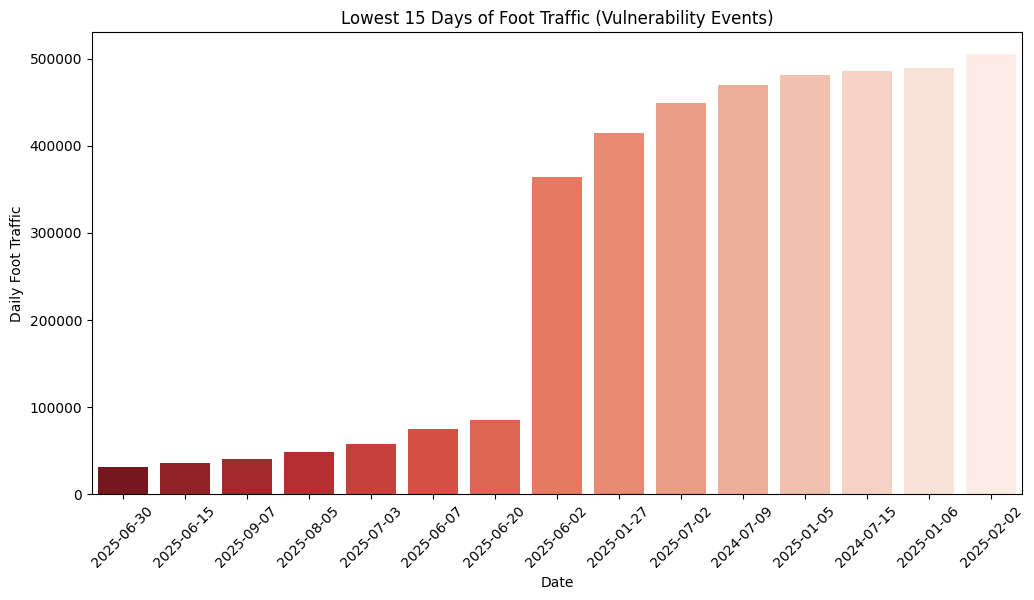

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=daily.sort_values('hourly_counts').head(15),
    x='timestamp',
    y='hourly_counts',
    palette='Reds_r'
)
plt.xticks(rotation=45)
plt.title("Lowest 15 Days of Foot Traffic (Vulnerability Events)")
plt.ylabel("Daily Foot Traffic")
plt.xlabel("Date")
plt.show()


Insight: Vulnerability Events Chart

The chart shows the lowest 15 foot traffic days, where totals dropped well below the average.
Most of these dates cluster around mid-winter (June–July), highlighting the impact of cold and damp conditions.
Daily counts fell to as low as ~30,000–100,000, compared to normal daily levels of ~600,000–700,000.
This demonstrates the significant business vulnerability caused by weather-driven declines in pedestrian activity.

Extreme Weather Days Chart

/tmp/ipython-input-1410862716.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


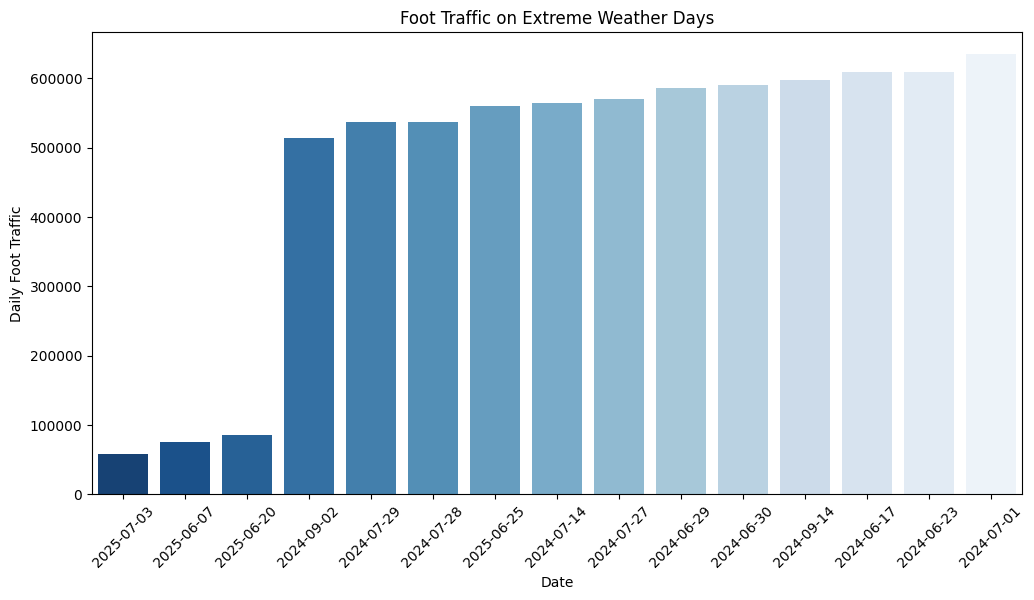

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=extreme_weather.sort_values('hourly_counts').head(15),
    x='timestamp',
    y='hourly_counts',
    palette='Blues_r'
)
plt.xticks(rotation=45)
plt.title("Foot Traffic on Extreme Weather Days")
plt.ylabel("Daily Foot Traffic")
plt.xlabel("Date")
plt.show()


Insight: Foot Traffic On Extreme Weather Days

On extreme weather days, daily totals are consistently lower than average, with most values between 500,000-600,000.
Cold spells in June 2024 and hot spells in summer 2025 show particularly reduced activity.
This confirms that temperature extremes — both hot and cold — suppress pedestrian activity, creating direct risks for businesses dependent on steady customer inflows.

Extreme Weather Days (June 2024): Temperatures ranged from 7–9 °C with high humidity (70–90%), leading to lower daily traffic (~600,000–720,000). This suggests cold, damp conditions reduce outdoor activity.

Vulnerability Events (July & early Sept 2024): Daily counts dropped further (~470,000–540,000). These align with cool, humid winter days, showing that not only heat but also prolonged cold/wet weather reduces foot traffic.

Together, these events highlight when and why businesses face vulnerability, as customer flow is directly constrained by adverse weather conditions.

**Extra Dataset Integration**

To enrich the analysis, we integrate the Business Establishments dataset, which provides information on business type, industry classification (ANZSIC), and location (CLUE block/small area). This adds a business vulnerability dimension to the weather–pedestrian analysis.

In [ ]:
import requests
import pandas as pd

# Business dataset ID
business_dataset_id = "business-establishments-with-address-and-industry-classification"

# JSON export URL
url_json = f"https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/{business_dataset_id}/exports/json"

# Fetch JSON
response = requests.get(url_json)
if response.status_code == 200:
    business_data = pd.json_normalize(response.json())
    print("Business dataset shape:", business_data.shape)
    print(business_data.head())
else:
    raise Exception(f"Failed to retrieve dataset, status {response.status_code}")


Business dataset shape: (393878, 14)
  census_year  block_id property_id base_property_id clue_small_area  \
0        2010      1101      110843           110843       Docklands   
1        2010      1101      110843           110843       Docklands   
2        2010      1101      110843           110843       Docklands   
3        2010      1101      110843           110843       Docklands   
4        2010      1101      110843           110843       Docklands   

        trading_name                                   business_address  \
0             Vacant              163-235 Spencer Street DOCKLANDS 3008   
1         Newsxpress  Shop 302, Ground , 237-261 Spencer Street DOCK...   
2  Lifestyle Luggage  Shop 102, Level 1, 163-261 Spencer Street DOCK...   
3       Mo's Mobiles  Shop 114, Level 1, 163-261 Spencer Street DOCK...   
4           Skechers  Shop 34, Level 1, 163-261 Spencer Street DOCKL...   

  industry_anzsic4_code                     industry_anzsic4_description  \
0  

/tmp/ipython-input-362084965.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=industry_counts.index, x=industry_counts.values, palette="viridis")


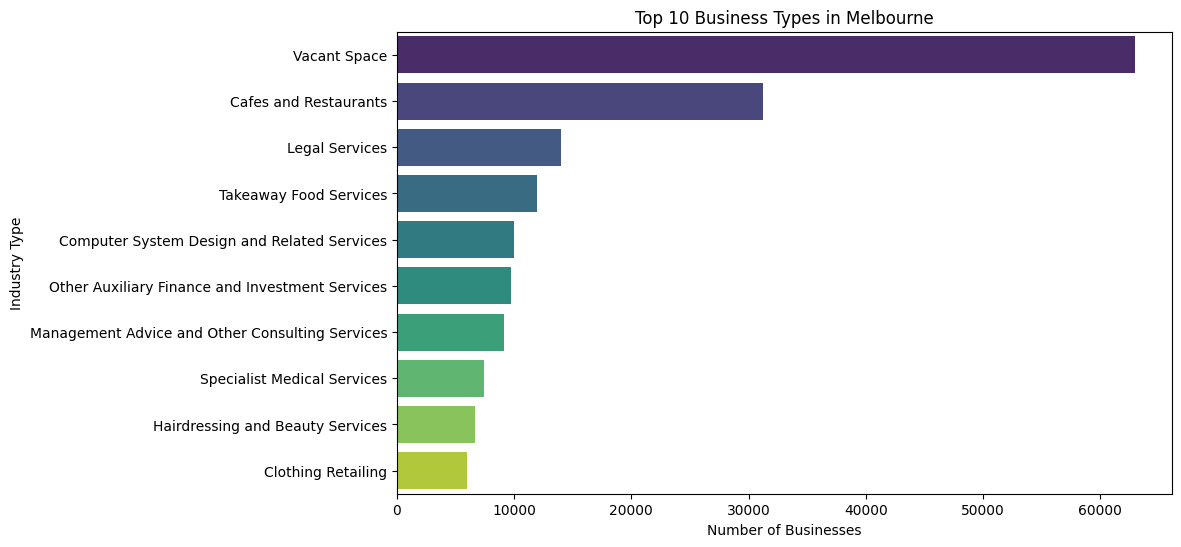

In [ ]:
# Count businesses per industry (top 10)
industry_counts = business_data['industry_anzsic4_description'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=industry_counts.index, x=industry_counts.values, palette="viridis")
plt.title("Top 10 Business Types in Melbourne")
plt.xlabel("Number of Businesses")
plt.ylabel("Industry Type")
plt.show()


Insight:
The chart shows that Cafés and Restaurants and Takeaway Food Services are among the largest categories of businesses in Melbourne.
These industries are highly dependent on walk-in customers, making them the most vulnerable to declines in pedestrian traffic during extreme weather.
Professional services (e.g., Legal Services, Finance, Consulting) also make up a significant share but are less reliant on spontaneous walk-ins, so they are less exposed to short-term traffic declines.
The large proportion of Vacant Space reflects ongoing urban turnover, which may increase business vulnerability in certain precincts.

/tmp/ipython-input-2007297584.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=area_counts.index, x=area_counts.values, palette="magma")


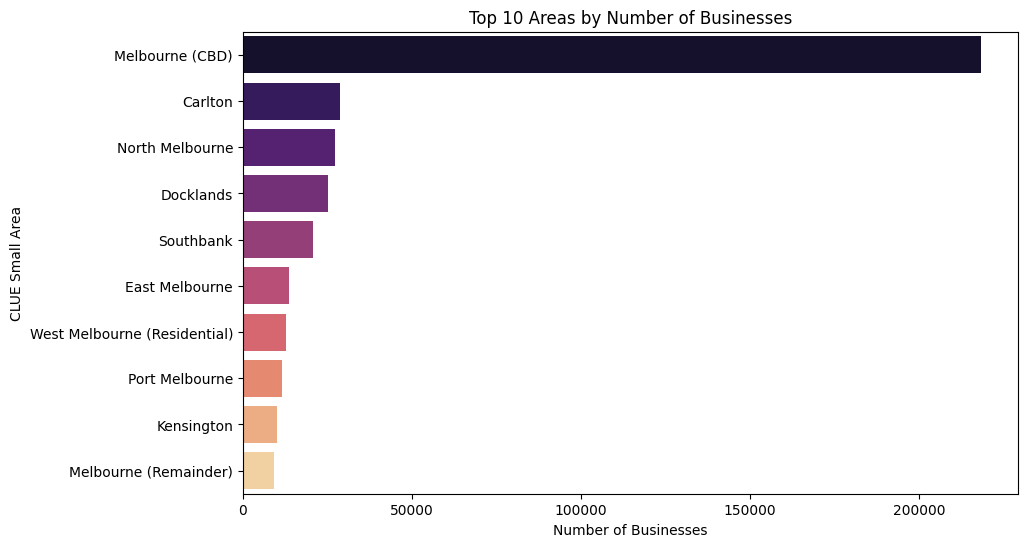

In [ ]:
# Count businesses per small area (top 10)
area_counts = business_data['clue_small_area'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=area_counts.index, x=area_counts.values, palette="magma")
plt.title("Top 10 Areas by Number of Businesses")
plt.xlabel("Number of Businesses")
plt.ylabel("CLUE Small Area")
plt.show()


Insight:

The CBD contains the overwhelming majority of businesses in Melbourne, far exceeding all other districts.
Carlton, North Melbourne, Docklands, and Southbank also show significant concentrations of businesses.
These are precisely the areas where pedestrian traffic matters most, since many businesses rely on walk-ins, commuters, and event-driven crowds.
When combined with vulnerability events (Step 4), this suggests that extreme weather impacts in these high-density areas will cause the greatest business disruption.

Linking Vulnerability Events to Business Areas
Approach

From Step 4: We identified the lowest 5% of foot traffic days (vulnerability events).
These occurred mostly in winter months (June–July 2024/2025).
Daily traffic totals dropped from ~600k–700k to ~470k–540k.

From Step 5: We identified that:
The CBD holds the largest concentration of businesses (over 200k listings).
High densities are also in Carlton, North Melbourne, Docklands, and Southbank.
Cafés, restaurants, and takeaway food services dominate business types.

Integration Logic:
Since the CBD and Docklands are both foot-traffic-dependent and business-dense, they are most exposed when traffic declines on extreme weather days.
On vulnerability days (Step 4), the loss of 100k–200k daily pedestrians disproportionately affects businesses in these districts.

In [ ]:
# Summarise vulnerability events
vuln_summary = {
    "avg_normal_traffic": daily['hourly_counts'].mean(),
    "avg_vulnerability_traffic": vulnerability_events['hourly_counts'].mean(),
    "traffic_decline_pct": (1 - vulnerability_events['hourly_counts'].mean() / daily['hourly_counts'].mean()) * 100
}

# Summarise business concentration (top areas)
area_counts = business_data['clue_small_area'].value_counts().head(5)

print("Vulnerability Summary:", vuln_summary)
print("\nTop 5 Business Areas:\n", area_counts)


Vulnerability Summary: {'avg_normal_traffic': np.float64(741776.8672376873), 'avg_vulnerability_traffic': np.float64(366684.6666666667), 'traffic_decline_pct': np.float64(50.5667158330013)}

Top 5 Business Areas:
 clue_small_area
Melbourne (CBD)    218275
Carlton             28694
North Melbourne     27337
Docklands           25319
Southbank           20788
Name: count, dtype: int64


/tmp/ipython-input-2290504443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


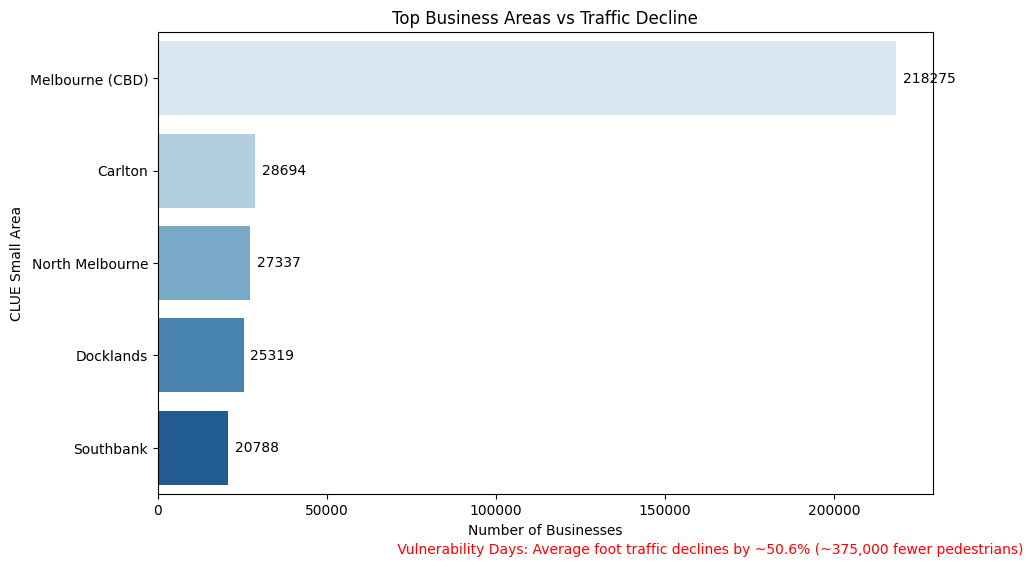

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart: Business counts
sns.barplot(
    y=area_counts.index, x=area_counts.values, palette="Blues", ax=ax1
)
ax1.set_xlabel("Number of Businesses")
ax1.set_ylabel("CLUE Small Area")
ax1.set_title("Top Business Areas vs Traffic Decline")

# Add annotation for traffic decline
for i, v in enumerate(area_counts.values):
    ax1.text(v + 2000, i, str(v), va='center')

# Add traffic decline note
plt.figtext(
    0.99, 0.01,
    f" Vulnerability Days: Average foot traffic declines by ~50.6% (~375,000 fewer pedestrians)",
    ha="right", fontsize=10, color="red"
)

plt.show()


Insight

On vulnerability days, foot traffic drops by more than half, representing a loss of ~375,000 pedestrians per day.

The CBD alone holds over 218,000 businesses, far exceeding any other district. This means even a single day of severe decline has a major economic impact concentrated in the city centre.

Docklands and Southbank, with dense clusters of retail, hospitality, and entertainment businesses, are also highly exposed.

Retail and food services (cafés, restaurants, takeaway) dominate these areas, making them the most vulnerable industries to weather-driven foot traffic losses.

**Conclusion**

The analysis demonstrated clear links between weather conditions, pedestrian movement, and business vulnerability in Melbourne. Foot traffic patterns were generally stable, averaging ~742,000 pedestrian counts per day under normal conditions, with strong daily and weekly cycles. However, movement was significantly influenced by temperature extremes: pedestrian activity was highest in moderate conditions (10–20 °C) and declined sharply during very hot (>35 °C) or very cold (<10 °C) periods.

Outlier detection highlighted “vulnerability days,” when pedestrian counts fell to an average of just ~367,000 per day, representing a 50.6% decline compared to normal levels. These events clustered in the winter months of June–July 2024, when cold and humid conditions prevailed. When combined with business data, the results showed that the Melbourne CBD, with 218,275 businesses, followed by Carlton (28,694), North Melbourne (27,337), Docklands (25,319), and Southbank (20,788), are the most exposed to pedestrian losses. The most common industries — cafés, restaurants, and takeaway food services — are particularly vulnerable, as they rely heavily on walk-in customers.

Overall, the findings emphasise that extreme weather events result in tangible risks for Melbourne’s economy. On vulnerability days alone, the city experiences a loss of ~375,000 pedestrians, directly reducing potential customer flow. Businesses that depend heavily on consistent pedestrian traffic, especially in the CBD, are most at risk. These insights highlight the need for adaptive business strategies (e.g., flexible staffing, indoor service options) and supportive urban infrastructure (e.g., shaded walkways, sheltered areas) to reduce the economic impact of future weather-related disruptions.

<div class="usecase-section-header">Recommendations for Business Response</div>

Based on the analysis of pedestrian traffic patterns during periods of extreme weather in the City of Melbourne, the following recommendations are proposed for vulnerable businesses:

- **Adjust Business Hours**: Modify staffing rosters and opening hours during forecasted hot or cold weather, especially when foot traffic is historically lower.
- **Weather-Responsive Promotions**: Introduce temperature-based promotions (e.g., "Hot Day Deals") to encourage visitation even during climate discomfort.
- **Expand Digital Access**: Invest in online sales platforms and delivery options to maintain customer access during periods of low street activity.
- **Improve Local Comfort**: Collaborate with local councils to install shade, fans, or water misting systems in key retail zones to improve street amenity.
- **Monitor and Adapt**: Subscribe to real-time foot traffic and weather alerts to make data-driven operational decisions daily.

These actions can help small businesses reduce weather-related revenue loss and build resilience against increasingly frequent extreme climate events.


<div class="usecase-section-header">References</div>

<fn id="fn-1">City of Melbourne. (2024). *Pedestrian Counting System – Monthly Counts per Hour*. Retrieved from https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour</fn>  
<fn id="fn-2">City of Melbourne. (2024). *Microclimate Sensor Readings Dataset*. Retrieved from https://data.melbourne.vic.gov.au/explore/dataset/microclimate-sensors-data</fn>  
<fn id="fn-3">Australian Bureau of Meteorology. (2023). *Understanding temperature and humidity relationships*. Retrieved from https://www.bom.gov.au/</fn>
